In [10]:
pip install citipy

     |████████████████████████████████| 557 kB 796 kB/s eta 0:00:01
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=da8053a16adb29f0b29d355a74f65ca4fb3daa7021541d42e9030962abafeb6c
  Stored in directory: /Users/marinaduarte/Library/Caches/pip/wheels/6d/df/5e/ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
#from api_key import api_key
api_key = "c49e94f29f9eff614a3e7cbf6f6876d5"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/marinaduarte/Documents/python-api-challenge/WeatherPy/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


606

In [25]:
coords = pd.DataFrame({
    "latitude": lats,
    "longitude": lngs})

coords.head()

,latitude,longitude
0,38.202081,122.752481
1,1.775274,83.522394
2,71.995438,-27.287956
3,-47.141891,50.023059
4,47.293469,116.121426


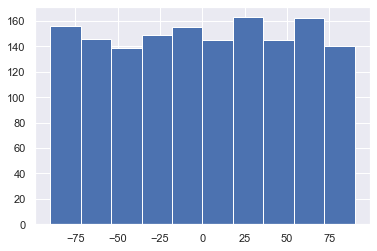

In [27]:

# And, we're going to give our plots a bit of pizazz.
# Feel free to skip these two lines
import seaborn

seaborn.set()

plt.hist(coords['latitude'])
plt.show()

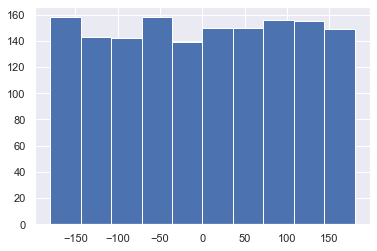

In [28]:
plt.hist(coords['longitude'])
plt.show()

In [32]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_weather = []
for x in range(len(cities)):
    print(f"Processing record {x} | {cities[x]}")

    # Get one of the cities
    weather_response = requests.get(url + "appid=" + api_key + "&q=" + cities[x])

    # Save post's JSON
    city_weather.append(weather_response.json())

Processing record 0 | weihai
Processing record 1 | hambantota
Processing record 2 | illoqqortoormiut
Processing record 3 | tsihombe
Processing record 4 | zabaykalsk
Processing record 5 | karratha
Processing record 6 | atuona
Processing record 7 | cidreira
Processing record 8 | vila velha
Processing record 9 | new norfolk
Processing record 10 | hermanus
Processing record 11 | yellowknife
Processing record 12 | abha
Processing record 13 | rawson
Processing record 14 | rikitea
Processing record 15 | khandyga
Processing record 16 | lompoc
Processing record 17 | soligalich
Processing record 18 | avarua
Processing record 19 | tasiilaq
Processing record 20 | wucheng
Processing record 21 | hobart
Processing record 22 | umzimvubu
Processing record 23 | ushuaia
Processing record 24 | punta arenas
Processing record 25 | provideniya
Processing record 26 | sao filipe
Processing record 27 | ponta do sol
Processing record 28 | khatanga
Processing record 29 | mataura
Processing record 30 | lashio
Proc

Processing record 249 | labuhan
Processing record 250 | srednekolymsk
Processing record 251 | praia da vitoria
Processing record 252 | manturovo
Processing record 253 | verkhoyansk
Processing record 254 | chokurdakh
Processing record 255 | ponoka
Processing record 256 | port lincoln
Processing record 257 | belushya guba
Processing record 258 | dzhebariki-khaya
Processing record 259 | sinnamary
Processing record 260 | opuwo
Processing record 261 | portland
Processing record 262 | bengkulu
Processing record 263 | khvatovka
Processing record 264 | pochutla
Processing record 265 | tuy hoa
Processing record 266 | colac
Processing record 267 | turbat
Processing record 268 | bambanglipuro
Processing record 269 | ende
Processing record 270 | pisco
Processing record 271 | krasnogorskiy
Processing record 272 | lovosice
Processing record 273 | masuguru
Processing record 274 | levelland
Processing record 275 | guerrero negro
Processing record 276 | tamiahua
Processing record 277 | chimbote
Process

Processing record 497 | evensk
Processing record 498 | la plata
Processing record 499 | camabatela
Processing record 500 | mount isa
Processing record 501 | harper
Processing record 502 | manzhouli
Processing record 503 | eyl
Processing record 504 | syracuse
Processing record 505 | waipawa
Processing record 506 | cravo norte
Processing record 507 | ettaiyapuram
Processing record 508 | siocon
Processing record 509 | kolpashevo
Processing record 510 | lata
Processing record 511 | adeje
Processing record 512 | huilong
Processing record 513 | nelson bay
Processing record 514 | broome
Processing record 515 | asau
Processing record 516 | zemio
Processing record 517 | badarwas
Processing record 518 | melilla
Processing record 519 | taoudenni
Processing record 520 | yuzhno-yeniseyskiy
Processing record 521 | moose factory
Processing record 522 | eureka
Processing record 523 | yamada
Processing record 524 | chitral
Processing record 525 | dingle
Processing record 526 | witrivier
Processing reco

In [44]:
#city_weatherDF = pd.DataFrame(city_weather)
#city_weatherDF.head()
# columns = ["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]

#Converts a Kelvin temperature to Fahrenheit
def k_to_f(temp):
    return temp * 9/5 - 459.67


#Converts a meters/s speed to miles/hour
def mps_to_mph(speed):
    return speed * 2.23694


for_dataframe = []
for x in city_weather:
    city = x['name']
    lat = x['coord']['lat']
    lon = x['coord']['lon']
    max_temp = k_to_f(x['main']['temp_max'])
    humidity = x['main']['humidity']
    cloudiness = x['clouds']['all']
    wind = mps_to_mph(x['wind']['speed'])
    country = x['sys']['country']
    date = x['dt']

    row = [city, lat, lon, max_temp, humidity, cloudiness, wind, country, date]
    for_dataframe.append(row)

weather_df = pd.DataFrame(for_dataframe)
weather_df.columns = [
    "City",
    "Lat",
    "Lng",
    "Max Temp",
    "Humidity",
    "Cloudiness",
    "Wind Speed",
    "Country",
    "Date",
]
weather_df.head()


KeyError: 'coord'

In [40]:
city_weatherDF = pd.DataFrame(city_weather)
city_weatherDF.head()

,coord,weather,base,main,visibility,wind,clouds,dt,sys,timezone,id,name,cod,message,rain,snow
0,"{'lon': 122.11, 'lat': 37.5}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': 288.36, 'feels_like': 284.89, 'temp_m...",10000.0,"{'speed': 2.25, 'deg': 322}",{'all': 0},1.602890e+09,"{'country': 'CN', 'sunrise': 1602885679, 'suns...",28800.0,1791673.0,Weihai,200,NaN,NaN,NaN
1,"{'lon': 81.12, 'lat': 6.12}","[{'id': 802, 'main': 'Clouds', 'description': ...",stations,"{'temp': 298.67, 'feels_like': 298.08, 'temp_m...",10000.0,"{'speed': 7.57, 'deg': 273}",{'all': 40},1.602890e+09,"{'country': 'LK', 'sunrise': 1602894080, 'suns...",19800.0,1244926.0,Hambantota,200,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,city not found,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404,city not found,NaN,NaN
4,"{'lon': 117.32, 'lat': 49.63}","[{'id': 800, 'main': 'Clear', 'description': '...",stations,"{'temp': 272.15, 'feels_like': 264.48, 'temp_m...",10000.0,"{'speed': 7.71, 'deg': 300}",{'all': 1},1.602890e+09,"{'country': 'RU', 'sunrise': 1602887701, 'suns...",28800.0,2012780.0,Zabaykal'sk,200,NaN,NaN,NaN


In [ ]:
weather_df.to_csv("cities.csv")